**Importing Dependencies**

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score

### Data Collection and Cleaning 

In [22]:
# Loading the dataset into a pandas dataframe 
df = pd.read_csv('titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# overview of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [24]:
# checking the number of rows and columns 
df.shape

(891, 11)

In [25]:
# checking for missing values 
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Handling Missing Values**

In [26]:
# droping the cabin column
df = df.drop('Cabin', axis=1)

In [27]:
# replacing the missing values in 'Embarked' column with it's mode 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [28]:
# replacing the missing values in 'Age' column with it's mean  
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [29]:
# checking the number of missing values in each column 
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Exploratory Data Analysis

In [30]:
# summary statistics 
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# distribution of survival 
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

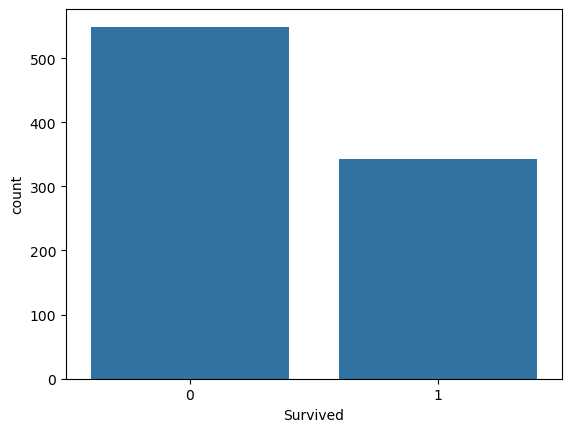

In [32]:
# visualising survived distribution with countplot 
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

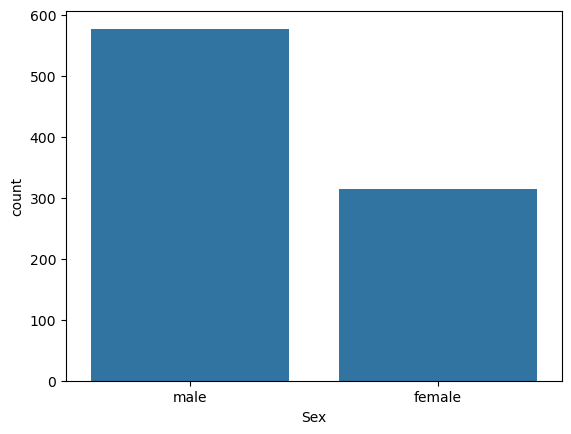

In [33]:
# visualising Sex(gender) distribution with countplot 
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Sex', ylabel='count'>

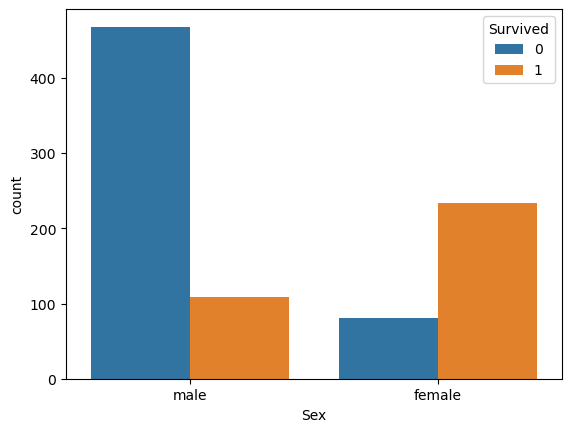

In [34]:
# distribution of survivers by Sex 
sns.countplot(x='Sex', hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

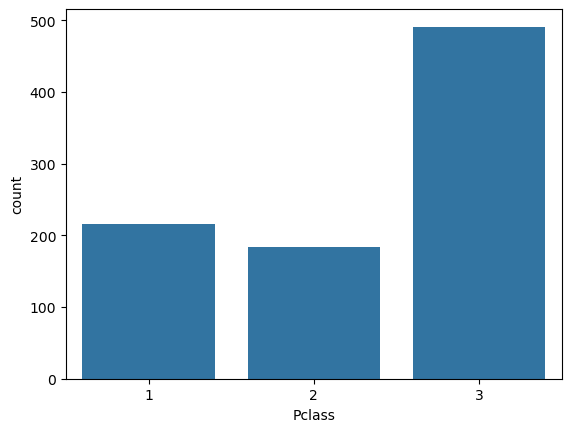

In [35]:
# visualising Sex(gender) distribution with countplot 
sns.countplot(x='Pclass', data=df)

### Data Preprocessing

**Encoding the categorical columns**

In [36]:
print(df['Sex'].value_counts())
print("\n" + "-" * 30 + "\n")
print(df['Pclass'].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64

------------------------------

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [37]:
le = LabelEncoder()

In [41]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [42]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [44]:
X = df.drop(['Name', 'Ticket', 'Survived'], axis=1)
Y = df['Survived']

In [45]:
print(X)

             Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
PassengerId                                                         
1                 3    1  22.000000      1      0   7.2500         2
2                 1    0  38.000000      1      0  71.2833         0
3                 3    0  26.000000      0      0   7.9250         2
4                 1    0  35.000000      1      0  53.1000         2
5                 3    1  35.000000      0      0   8.0500         2
...             ...  ...        ...    ...    ...      ...       ...
887               2    1  27.000000      0      0  13.0000         2
888               1    0  19.000000      0      0  30.0000         2
889               3    0  29.699118      1      2  23.4500         2
890               1    1  26.000000      0      0  30.0000         0
891               3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [46]:
print(Y)

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


**Splitting the data into Training and Test data**

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=13)

In [48]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (757, 7) (134, 7)


### Model Training and Evaluation

**Model Training: Decision Trees**

In [54]:
model = DecisionTreeClassifier(max_depth=5)

In [55]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

**Model Evaluation**

In [56]:
# prediction on training data
X_train_prediction = model.predict(X_train)

# accuracy on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy score on Training data :', training_data_accuracy)

Accuracy score on Training data : 0.8494055482166446


In [57]:
# prediction on test data
X_test_prediction = model.predict(X_test)

# accuracy on test data
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score on Test data :', test_data_accuracy)

Accuracy score on Test data : 0.8283582089552238


In [58]:
joblib.dump(model, 'titanic_survival_prediction_model2')

['titanic_survival_prediction_model2']